In [50]:
import pandas as pd

from tms_risk.utils import get_subjects, get_tms_conditions
from tqdm.contrib.itertools import product
import seaborn as sns
import pingouin

In [109]:
subjects = get_subjects(all_tms_conditions=True)

In [110]:
pars = []
keys = []

for sub, session, roi in product(subjects, [1,2,3], ['NPCr1cm-cluster', 'NPCr1cm-surface', 'NPCr2cm-cluster', 'NPCr2cm-surface']):

    try:
        pars.append(sub.get_prf_parameters_volume(session, smoothed=True, retroicor=False, denoise=True, cross_validated=False, natural_space=True, roi=roi))
        keys.append((sub.subject, session, roi))
    except Exception as e:
        print(e)

pars = pd.concat(pars, keys=keys, names=['subject', 'session', 'roi'])
tms_conditions = get_tms_conditions()
for key in tms_conditions:
    tms_conditions[key][1] = 'baseline'

pars['stimulation_condition'] = pars.reset_index().apply(lambda d: tms_conditions[d['subject']][d['session']],  axis=1).values
pars = pars.set_index('stimulation_condition', append=True)
pars.index = pars.index.set_names('voxel', level=-2)


  0%|          | 0/420 [00:00<?, ?it/s]

,,Source,ddof1,ddof2,F,p-unc,ng2,eps
roi,,,,,,,,
NPCr1cm-cluster,0,stimulation_condition,1,34,0.491743,0.487923,0.005428,1.0
NPCr1cm-surface,0,stimulation_condition,1,34,0.345331,0.560651,0.004104,1.0
NPCr2cm-cluster,0,stimulation_condition,1,34,3.019308,0.091330,0.028887,1.0
NPCr2cm-surface,0,stimulation_condition,1,34,1.782503,0.190713,0.018326,1.0


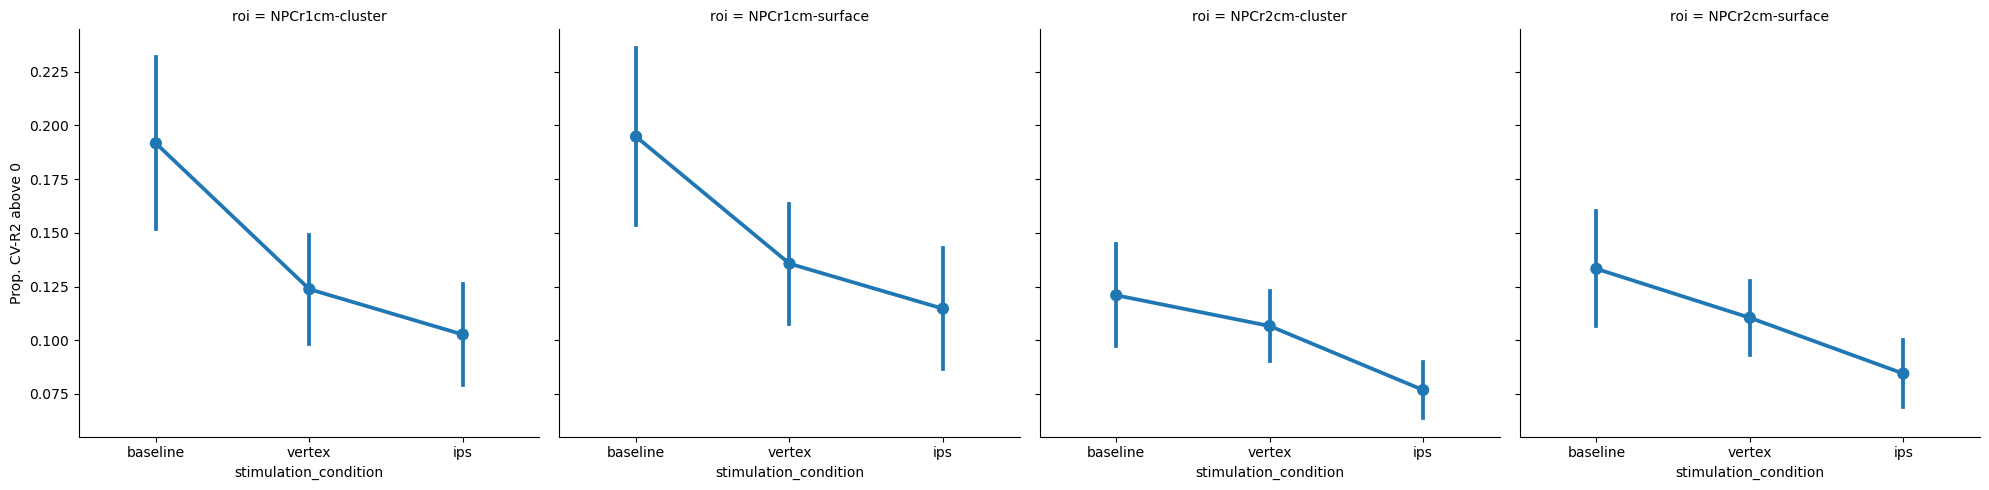

In [111]:
cvr2 = pars.groupby(['subject', 'session', 'stimulation_condition', 'roi'])['cvr2'].apply(lambda x: (x>0.0).mean()).to_frame('Prop. CV-R2 above 0')

sns.catplot(cvr2.reset_index(), x='stimulation_condition', y='Prop. CV-R2 above 0', kind='point', errorbar='se', dodge=True, col='roi')
cvr2.drop('baseline', level='stimulation_condition').groupby(['roi']).apply(lambda d: pingouin.rm_anova(d.reset_index(), dv='Prop. CV-R2 above 0', within='stimulation_condition', subject='subject'))

,Source,ddof1,ddof2,F,p-unc,ng2,eps
0,session,1,34,1.471435,0.23348,0.015031,1.0


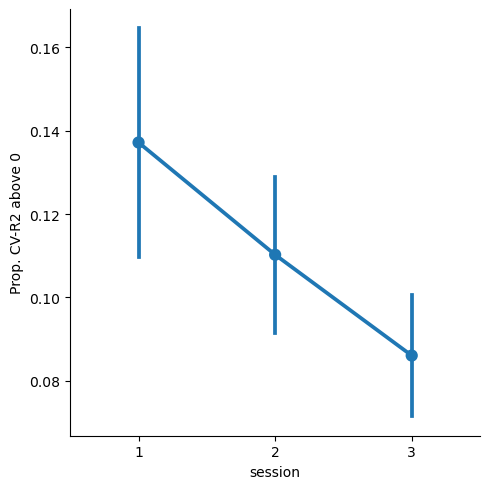

In [112]:
cvr2 = pars.groupby(['subject', 'session', 'stimulation_condition'])['cvr2'].apply(lambda x: (x>0.0).mean()).to_frame('Prop. CV-R2 above 0')

sns.catplot(cvr2.reset_index(), x='session', y='Prop. CV-R2 above 0', kind='point', errorbar='se', dodge=True)
pingouin.rm_anova(cvr2.drop('baseline', level='stimulation_condition').reset_index(), dv='Prop. CV-R2 above 0', within='session', subject='subject')

In [113]:
tmp = pars.unstack(['stimulation_condition', 'session']).fillna(0.0)
tmp

parameter                             mu                                  \
stimulation_condition           baseline     vertex       ips              
session                                1          2         3          2   
subject roi             voxel                                              
01      NPCr1cm-cluster 0       8.371241   8.163292  7.069055   0.000000   
                        1       8.554452  72.273201  8.279497   0.000000   
                        2       8.467885  71.871300  8.545609   0.000000   
                        3       6.330289   8.024560  2.092299   0.000000   
                        4       5.799314   7.981975  1.404377   0.000000   
...                                  ...        ...       ...        ...   
74      NPCr2cm-surface 299    35.270283   0.000000  0.000000  64.925690   
                        300    33.193996   0.000000  0.000000  31.400505   
                        301     7.964335   0.000000  0.000000   6.158774   
                        302    36.777489   0.000000  0.000000   3.781244   
                        303    35.256283   0.000000  0.000000  29.905474   

parameter                                       sd                      \
stimulation_condition             vertex  baseline    vertex       ips   
session                                3         1         2         3   
subject roi             voxel                                            
01      NPCr1cm-cluster 0       0.000000  0.767666  4.989773  4.101304   
                        1       0.000000  1.411757  2.310468  2.359178   
                        2       0.000000  1.554066  2.297141  5.081396   
                        3       0.000000  2.066085  0.794063  2.092100   
                        4       0.000000  1.649741  0.798016  5.355729   
...                                  ...       ...       ...       ...   
74      NPCr2cm-surface 299    17.263042  5.023608  0.000000  0.000000   
                        300    84.734146  5.822561  0.000000  0.000000   
                        301    91.835114  1.600392  0.000000  0.000000   
                        302    77.653740  4.022333  0.000000  0.000000   
                        303    89.877274  5.364074  0.000000  0.000000   

parameter                                           ...        r2            \
stimulation_condition                       vertex  ...  baseline    vertex   
session                               2          3  ...         1         2   
subject roi             voxel                       ...                       
01      NPCr1cm-cluster 0      0.000000   0.000000  ...  0.087469  0.035101   
                        1      0.000000   0.000000  ...  0.063242  0.030754   
                        2      0.000000   0.000000  ...  0.059756  0.019480   
                        3      0.000000   0.000000  ...  0.105178  0.078628   
                        4      0.000000   0.000000  ...  0.112746  0.094232   
...                                 ...        ...  ...       ...       ...   
74      NPCr2cm-surface 299    2.778348   1.300497  ...  0.046753  0.000000   
                        300    4.528222  11.452358  ...  0.012529  0.000000   
                        301    0.669859  15.512555  ...  0.033882  0.000000   
                        302    2.129328   7.393316  ...  0.043197  0.000000   
                        303    4.401074  10.898542  ...  0.021080  0.000000   

parameter                                                        cvr2  \
stimulation_condition               ips              vertex  baseline   
session                               3         2         3         1   
subject roi             voxel                                           
01      NPCr1cm-cluster 0      0.067192  0.000000  0.000000  0.072271   
                        1      0.039253  0.000000  0.000000 -0.078616   
                        2      0.028975  0.000000  0.000000 -0.160444   
                        3      0.067724  0.000000  

In [106]:
def get_top_n_r2(d, n=100):
    d.sort_values(('r2', 'baseline'), ascending=False, inplace=True)
    return d.iloc[:n].sort_index()

In [107]:
pars_filtered = pars.droplevel('session').unstack(['stimulation_condition']).groupby(['subject', 'roi']).apply(get_top_n_r2)

Source  ddof1  ddof2         F  \
parameter roi                                                                
amplitude NPCr1cm-cluster 0  stimulation_condition      1     34  0.242834   
          NPCr1cm-surface 0  stimulation_condition      1     34  0.275171   
          NPCr2cm-cluster 0  stimulation_condition      1     34  1.833451   
          NPCr2cm-surface 0  stimulation_condition      1     34  1.468008   
baseline  NPCr1cm-cluster 0  stimulation_condition      1     34  0.267878   
          NPCr1cm-surface 0  stimulation_condition      1     34  0.906908   
          NPCr2cm-cluster 0  stimulation_condition      1     34  0.904977   
          NPCr2cm-surface 0  stimulation_condition      1     34  0.606864   
cvr2      NPCr1cm-cluster 0  stimulation_condition      1     34  0.326626   
          NPCr1cm-surface 0  stimulation_condition      1     34  0.003658   
          NPCr2cm-cluster 0  stimulation_condition      1     34  1.241160   
          NPCr2cm-surface 0  stimulation_condition      1     34  1.459713   
mu        NPCr1cm-cluster 0  stimulation_condition      1     34  4.790166   
          NPCr1cm-surface 0  stimulation_condition      1     34  1.761791   
          NPCr2cm-cluster 0  stimulation_condition      1     34  2.656987   
          NPCr2cm-surface 0  stimulation_condition      1     34  3.671591   
r2        NPCr1cm-cluster 0  stimulation_condition      1     34  1.737273   
          NPCr1cm-surface 0  stimulation_condition      1     34  0.078291   
          NPCr2cm-cluster 0  stimulation_condition      1     34  4.374802   
          NPCr2cm-surface 0  stimulation_condition      1     34  4.127549   
sd        NPCr1cm-cluster 0  stimulation_condition      1     34  0.143179   
          NPCr1cm-surface 0  stimulation_condition      1     34  0.181743   
          NPCr2cm-cluster 0  stimulation_condition      1     34  0.396962   
          NPCr2cm-surface 0  stimulation_condition      1     34  0.088269   

                                p-unc       ng2  eps  
parameter roi                                         
amplitude NPCr1cm-cluster 0  0.625334  0.003482  1.0  
          NPCr1cm-surface 0  0.603288  0.003268  1.0  
          NPCr2cm-cluster 0  0.184653  0.021842  1.0  
          NPCr2cm-surface 0  0.234014  0.018801  1.0  
baseline  NPCr1cm-cluster 0  0.608110  0.002142  1.0  
          NPCr1cm-surface 0  0.347658  0.007285  1.0  
          NPCr2cm-cluster 0  0.348165  0.008078  1.0  
          NPCr2cm-surface 0  0.441360  0.005622  1.0  
cvr2      NPCr1cm-cluster 0  0.571412  0.004749  1.0  
          NPCr1cm-surface 0  0.952123  0.000055  1.0  
          NPCr2cm-cluster 0  0.273062  0.019157  1.0  
          NPCr2cm-surface 0  0.235312  0.021774  1.0  
mu        NPCr1cm-cluster 0  0.035588  0.036611  1.0  
          NPCr1cm-surface 0  0.193246  0.016553  1.0  
          NPCr2cm-cluster 0  0.112327  0.016326  1.0  
          NPCr2cm-surface 0  0.063786  0.025392  1.0  
r2        NPCr1cm-cluster 0  0.196296  0.009476  1.0  
          NPCr1cm-surface 0  0.781322  0.000468  1.0  
          NPCr2cm-cluster 0  0.044017  0.025347  1.0  
          NPCr2cm-surface 0  0.050065  0.024972  1.0  
sd        NPCr1cm-cluster 0  0.707494  0.001897  1.0  
          NPCr1cm-surface 0  0.672567  0.002356  1.0  
          NPCr2cm-cluster 0  0.532874  0.004591  1.0  
          NPCr2cm-surface 0  0.768197  0.001018  1.0

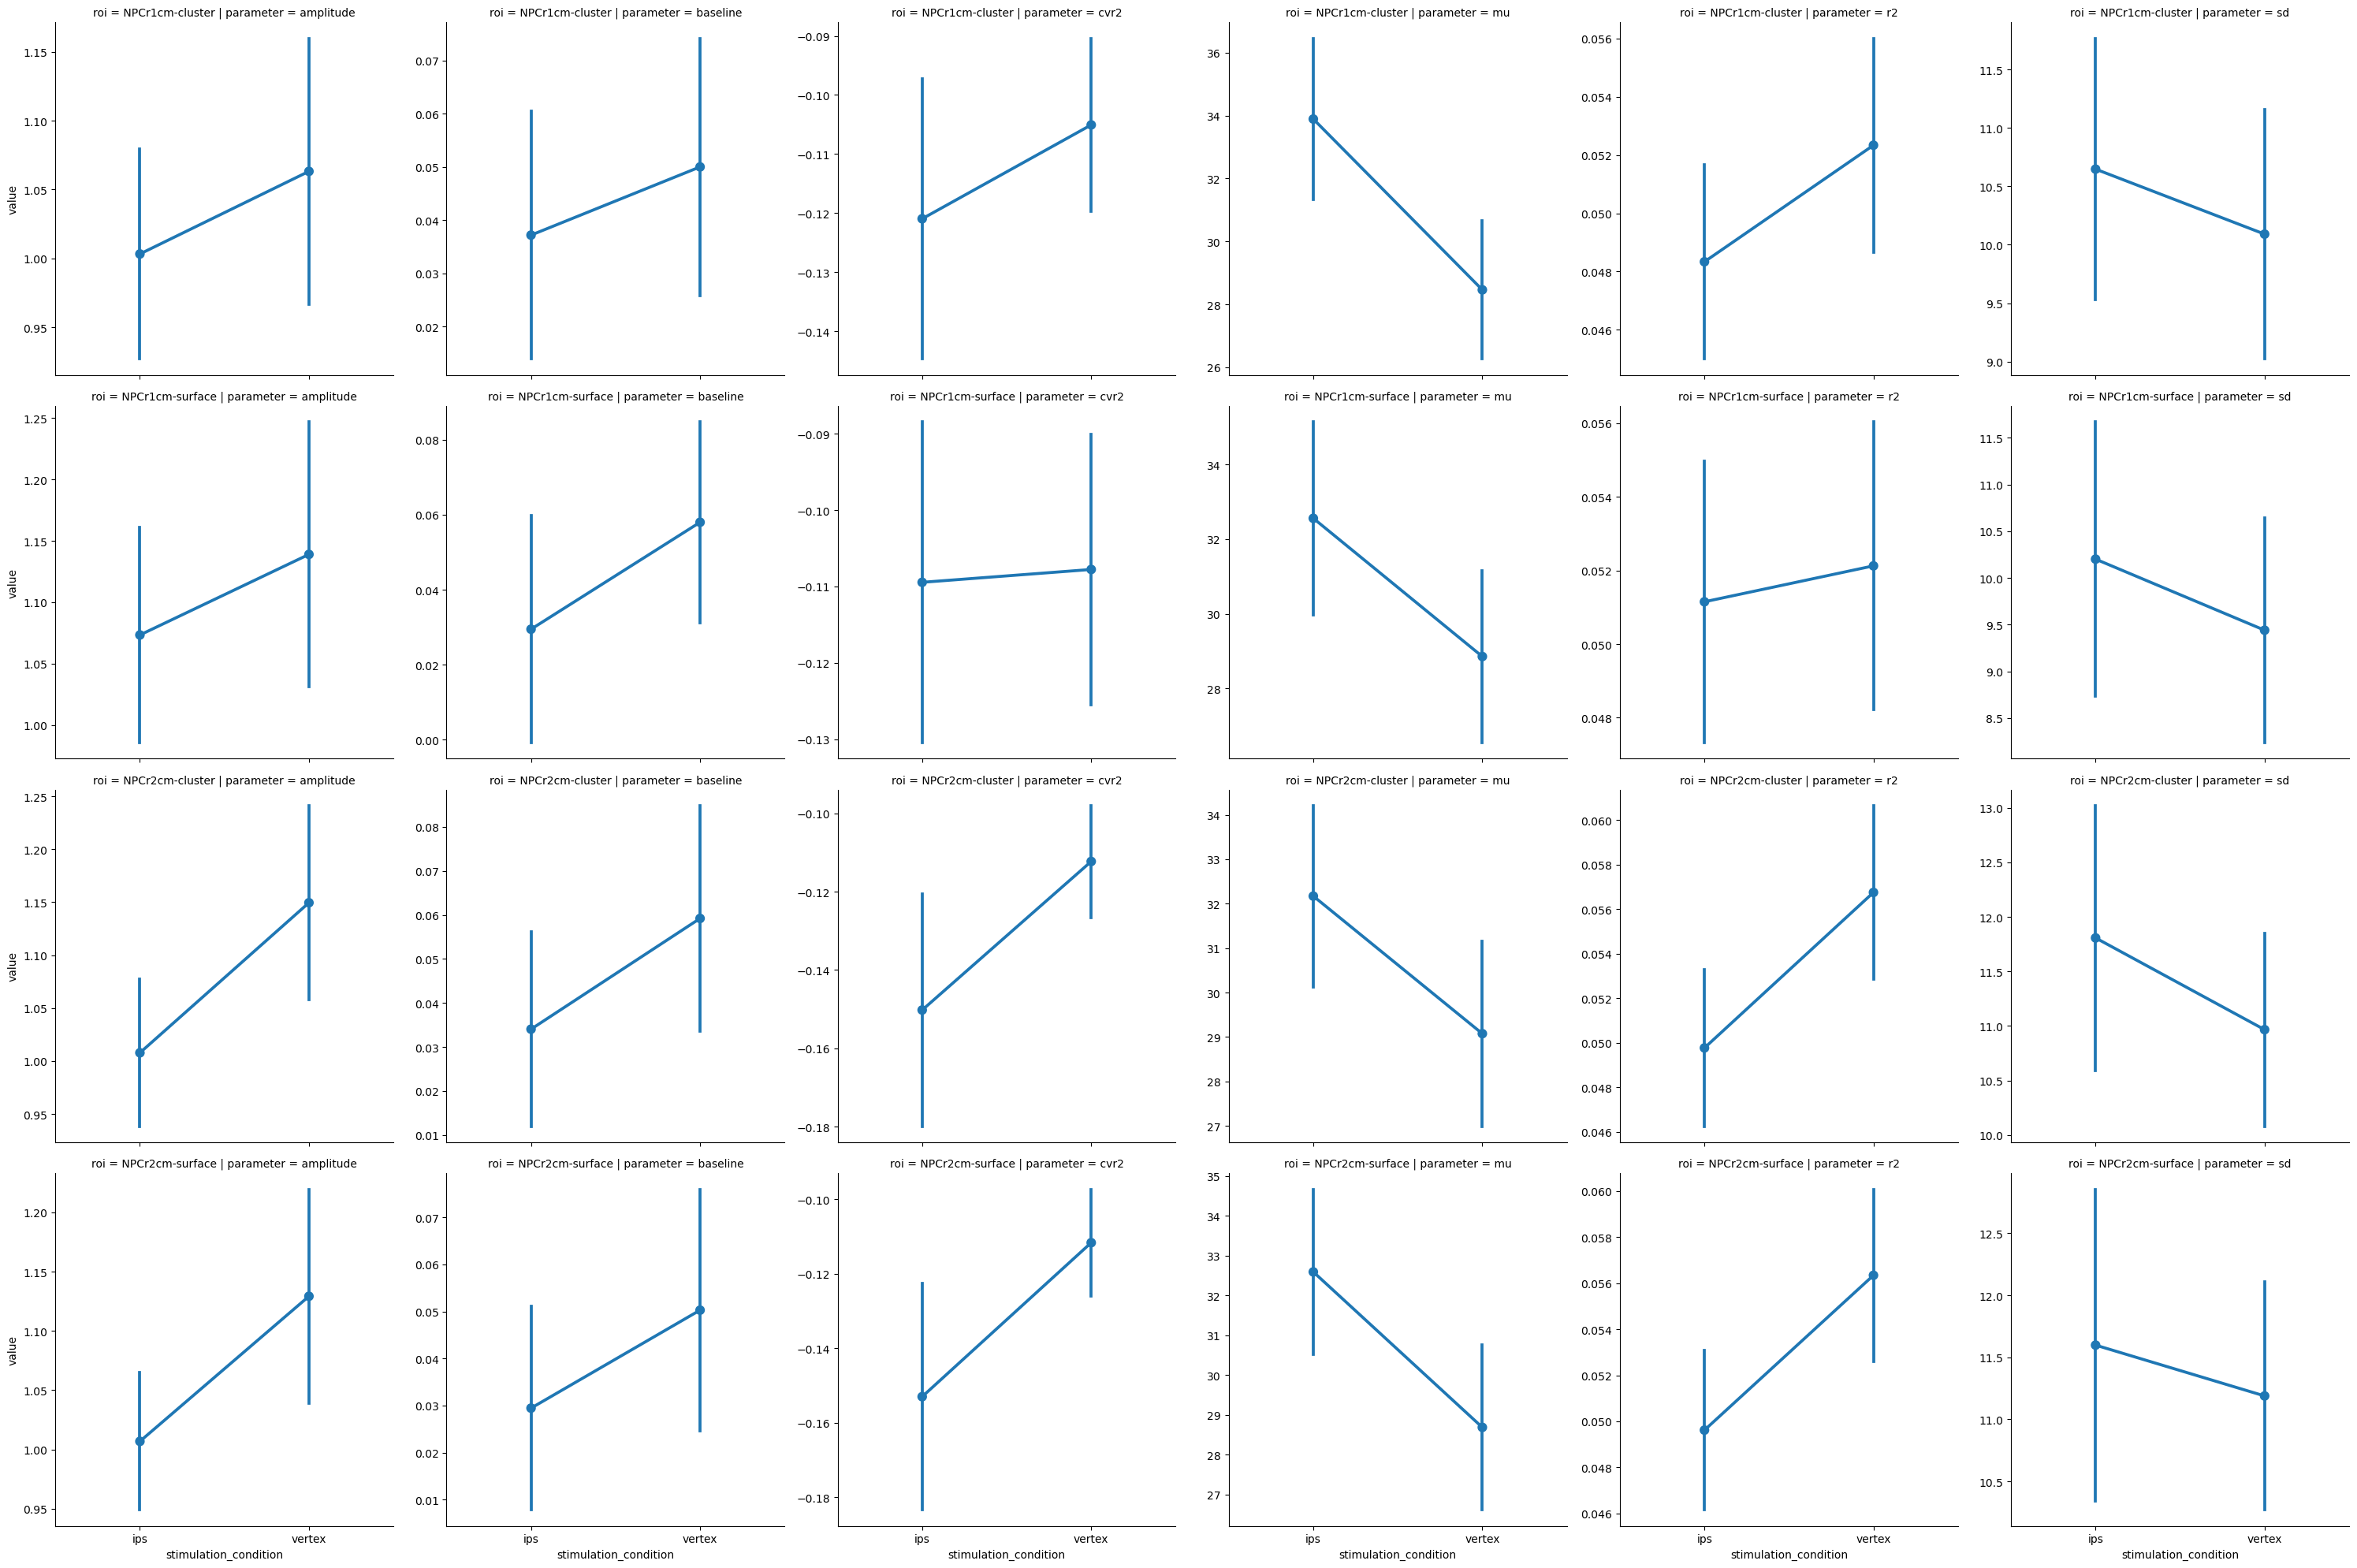

In [108]:
tmp = pars_filtered.stack([0, 1]).to_frame('value')
tmp = tmp.drop('baseline', level='stimulation_condition').groupby(['subject', 'stimulation_condition', 'parameter', 'roi']).mean().reset_index()

sns.catplot(tmp, x='stimulation_condition', y='value', col='parameter', row='roi', sharey=False, kind='point', errorbar='se')

tmp.groupby(['parameter', 'roi']).apply(lambda d: pingouin.rm_anova(d, dv='value', within='stimulation_condition', subject='subject'))